In [289]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_moons
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, balanced_accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [277]:
heart=pd.read_csv('heart.csv')
segment=pd.read_csv('segment.csv')
vehicle=pd.read_csv('vehicle.csv')

In [263]:
heart.head(5)

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,present
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,absent
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,present
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,absent
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,absent


In [264]:
segment.head(5)

,region.centroid.col,region.centroid.row,region.pixel.count,short.line.density.5,short.line.density.2,vedge.mean,vegde.sd,hedge.mean,hedge.sd,intensity.mean,rawred.mean,rawblue.mean,rawgreen.mean,exred.mean,exblue.mean,exgreen.mean,value.mean,saturation.mean,hue.mean,class
0,218,178,9,0.111111,0.0,0.833333,0.547722,1.111110,0.544331,59.629600,52.4444,75.22220,51.222200,-21.55560,46.7778,-25.22220,75.22220,0.318996,-2.04055,path
1,113,130,9,0.000000,0.0,0.277778,0.250924,0.333333,0.365148,0.888889,0.0000,2.55556,0.111111,-2.66667,5.0000,-2.33333,2.55556,1.000000,-2.12325,foliage
2,202,41,9,0.000000,0.0,0.944448,0.772202,1.111110,1.025600,123.037000,111.8890,139.77800,117.444000,-33.44440,50.2222,-16.77780,139.77800,0.199347,-2.29992,sky
3,32,173,9,0.000000,0.0,1.722220,1.781590,9.000000,6.749490,43.592600,39.5556,52.88890,38.333300,-12.11110,27.8889,-15.77780,52.88890,0.266914,-1.99886,path
4,61,197,9,0.000000,0.0,1.444440,1.515350,2.611110,1.925460,49.592600,44.2222,61.55560,43.000000,-16.11110,35.8889,-19.77780,61.55560,0.302925,-2.02227,path


In [265]:
vehicle.head(5)

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


In [266]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   270 non-null    int64  
 1   sex                                   270 non-null    int64  
 2   chest                                 270 non-null    int64  
 3   resting_blood_pressure                270 non-null    int64  
 4   serum_cholestoral                     270 non-null    int64  
 5   fasting_blood_sugar                   270 non-null    int64  
 6   resting_electrocardiographic_results  270 non-null    int64  
 7   maximum_heart_rate_achieved           270 non-null    int64  
 8   exercise_induced_angina               270 non-null    int64  
 9   oldpeak                               270 non-null    float64
 10  slope                                 270 non-null    int64  
 11  number_of_major_ves

In [267]:
segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310 entries, 0 to 2309
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   region.centroid.col   2310 non-null   int64  
 1   region.centroid.row   2310 non-null   int64  
 2   region.pixel.count    2310 non-null   int64  
 3   short.line.density.5  2310 non-null   float64
 4   short.line.density.2  2310 non-null   float64
 5   vedge.mean            2310 non-null   float64
 6   vegde.sd              2310 non-null   float64
 7   hedge.mean            2310 non-null   float64
 8   hedge.sd              2310 non-null   float64
 9   intensity.mean        2310 non-null   float64
 10  rawred.mean           2310 non-null   float64
 11  rawblue.mean          2310 non-null   float64
 12  rawgreen.mean         2310 non-null   float64
 13  exred.mean            2310 non-null   float64
 14  exblue.mean           2310 non-null   float64
 15  exgreen.mean         

In [268]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   COMPACTNESS                846 non-null    int64 
 1   CIRCULARITY                846 non-null    int64 
 2   DISTANCE_CIRCULARITY       846 non-null    int64 
 3   RADIUS_RATIO               846 non-null    int64 
 4   PR.AXIS_ASPECT_RATIO       846 non-null    int64 
 5   MAX.LENGTH_ASPECT_RATIO    846 non-null    int64 
 6   SCATTER_RATIO              846 non-null    int64 
 7   ELONGATEDNESS              846 non-null    int64 
 8   PR.AXIS_RECTANGULARITY     846 non-null    int64 
 9   MAX.LENGTH_RECTANGULARITY  846 non-null    int64 
 10  SCALED_VARIANCE_MAJOR      846 non-null    int64 
 11  SCALED_VARIANCE_MINOR      846 non-null    int64 
 12  SCALED_RADIUS_OF_GYRATION  846 non-null    int64 
 13  SKEWNESS_ABOUT_MAJOR       846 non-null    int64 
 14  SKEWNESS_A

In [269]:
def description(dataset):
    name_target=dataset.columns[-1]
    print(f'Le dataset a {len(dataset)} exemples et {dataset.shape[1]} variables. Il a {len(set(dataset[name_target]))}')
    for classe in set(dataset[name_target]):
        print(f'Le classe {classe} a {len(dataset[dataset[name_target]==classe])}')

In [270]:
description(heart)

Le dataset a 270 exemples et 14 variables. Il a 2
Le classe present a 120
Le classe absent a 150


In [271]:
description(segment)

Le dataset a 2310 exemples et 20 variables. Il a 7
Le classe path a 330
Le classe window a 330
Le classe foliage a 330
Le classe brickface a 330
Le classe sky a 330
Le classe grass a 330
Le classe cement a 330


In [272]:
description(vehicle)

Le dataset a 846 exemples et 19 variables. Il a 4
Le classe van a 199
Le classe saab a 217
Le classe opel a 212
Le classe bus a 218


# 2. Sélectionnez 3 méthodes de ML 

## Pour le dataset heart

### Normalisation

In [305]:
def pipeline_selection(dataset):
    
    dataset_feat=dataset[list(dataset.columns[:-1])]
    dataset_label=dataset[dataset.columns[-1]]

    #separation en train valid test
    X_train,X_test,Y_train,Y_test=train_test_split(dataset_feat,dataset_label,test_size=0.2,stratify=dataset_label,random_state=42)
    X_train,X_valid,Y_train,Y_valid=train_test_split(X_train,Y_train,test_size=0.4,stratify=Y_train)

    #Normalisation

    std=StandardScaler()
    X_train=std.fit_transform(X_train)
    X_valid=std.transform(X_valid)
    X_test=std.transform(X_test)

    #Fusion train et valid pour faire le dernier apprentissage avant de tester sur le jeu de test

    train=np.concatenate([X_train,X_valid])
    label=np.concatenate([Y_train,Y_valid])

    #C pour la regression logistique et le SVM
    C=np.logspace(-3,2,20) 
    
    #Regression logistique
     
    best_score=0
    for c in C:
        clf=LogisticRegression(penalty='l2',C=c)
        clf.fit(X_train,Y_train)
        new_score=clf.score(X_valid,Y_valid)
        if new_score > best_score:
              best_score=new_score
              best_c=c
            
    #Tester sur le jeu de test
    clf=LogisticRegression(penalty='l2',C=best_c)
    clf.fit(train,label)
    ypred=clf.predict(X_test)
    logis_score=balanced_accuracy_score(Y_test,ypred)
    print(f'Le score pour le modele de regression logistique sur les données de test est : {logis_score}') 

    #SVM
    gamma=np.logspace(-3,2,20)
    best_score=0
    for c in C:
        for g in gamma :
            clf=SVC(kernel='rbf',C=c,gamma=g)
            clf.fit(X_train,Y_train)
            new_score=clf.score(X_valid,Y_valid)
            if new_score > best_score:
                  best_score=new_score
                  best_param=(c,g)
    #Test
    clf=SVC(kernel='rbf',C=best_param[0],gamma=best_param[1])
    clf.fit(train,label)
    ypred=clf.predict(X_test)
    svm_score=balanced_accuracy_score(Y_test,ypred)
    print(f'Le score pour le model SVM sur les données de test est : {svm_score}')

    #Tree
    profondeurs=np.arange(1,51)
    leaf=np.arange(1,51)
    leaf=leaf/100
    best_score=0
    for p in profondeurs:
        for l in leaf :
                clf=DecisionTreeClassifier(max_depth=p,min_samples_leaf= l)
                clf.fit(X_train,Y_train)
                new_score=clf.score(X_valid,Y_valid)
                if new_score > best_score:
                      best_score=new_score
                      best_param=(p,l)

    #Test
    clf=DecisionTreeClassifier(max_depth=best_param[0],min_samples_leaf=best_param[1])
    clf.fit(train,label)
    ypred=clf.predict(X_test)
    tree_score=balanced_accuracy_score(Y_test,ypred)
    print(f'Le score pour le modele arbre de decision sur les données de test est : {tree_score}') 
    
    #Visualisation
    all_score=[logis_score,svm_score,tree_score]
    model=['RegLogistic','SVM','Tree']
    color=['blue','red','yellow']
    plt.bar(model,all_score,color=color)
    return all_score


## Pour le dataset heart

Le score pour le modele de regression logistique sur les données de test est : 0.8333333333333334
Le score pour le model SVM sur les données de test est : 0.8541666666666667
Le score pour le modele arbre de decision sur les données de test est : 0.8375


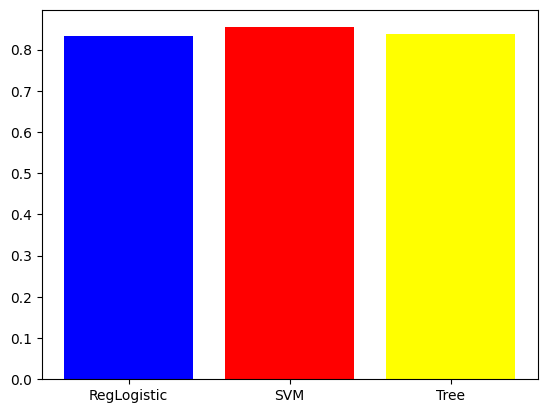

In [313]:
sc_heart=pipeline_selection(heart)

## Pour le dataset segment

Le score pour le modele de regression logistique sur les données de test est : 0.9632034632034632
Le score pour le model SVM sur les données de test est : 0.9675324675324676
Le score pour le modele arbre de decision sur les données de test est : 0.9199134199134199


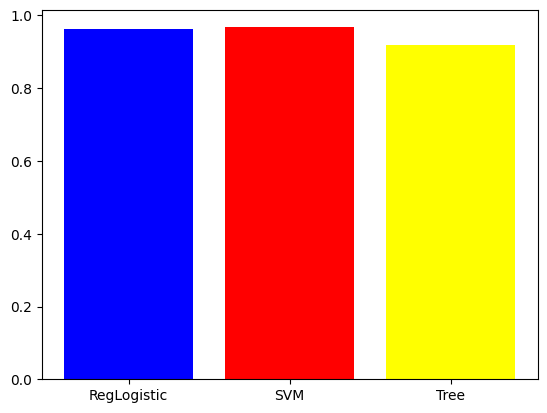

In [314]:
score_segment=pipeline_selection(segment)

## Pour le dataset vehicle

Le score pour le modele de regression logistique sur les données de test est : 0.8408820346320347
Le score pour le model SVM sur les données de test est : 0.8414231601731602
Le score pour le modele arbre de decision sur les données de test est : 0.7410984848484848


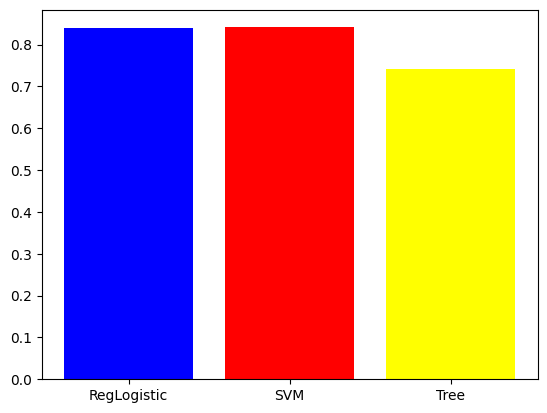

In [315]:
score_vehic=pipeline_selection(vehicle)

# 2 Bonus : test statistique de significativité

In [327]:
Sij=np.array([sc_heart[:-1],score_segment[:-1],score_vehic[:-1]])
Sij

array([[0.83333333, 0.85416667],
       [0.96320346, 0.96753247],
       [0.84088203, 0.84142316]])

In [328]:
Sj=Sij[:,0]-Sij[:,1]

In [329]:
Sj

array([-0.02083333, -0.004329  , -0.00054113])